In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
fashion_train_df= pd.read_csv('D:\mini project\Deep Learning (1)\Deep Learning/fashion-mnist_train.csv')

In [4]:
fashion_test_df = pd.read_csv('D:\mini project\Deep Learning (1)\Deep Learning/fashion-mnist_test.csv')

In [5]:
fashion_train_df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [6]:
fashion_train_df.tail()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[5 rows x 785 columns]

In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
fashion_test_df.shape

(10000, 785)

In [9]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [10]:
training.shape

(60000, 785)

In [11]:
import random

0.0

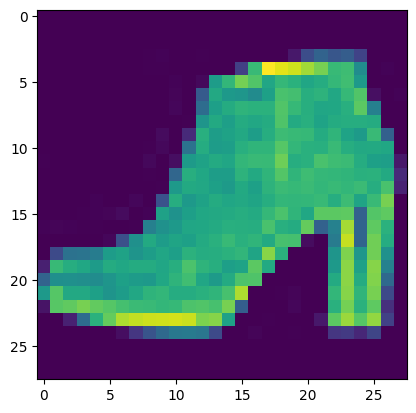

In [12]:
i = random.randint(0,60001) 
plt.imshow(training[i,1:].reshape(28,28)) 
label = training[i,1] 
label

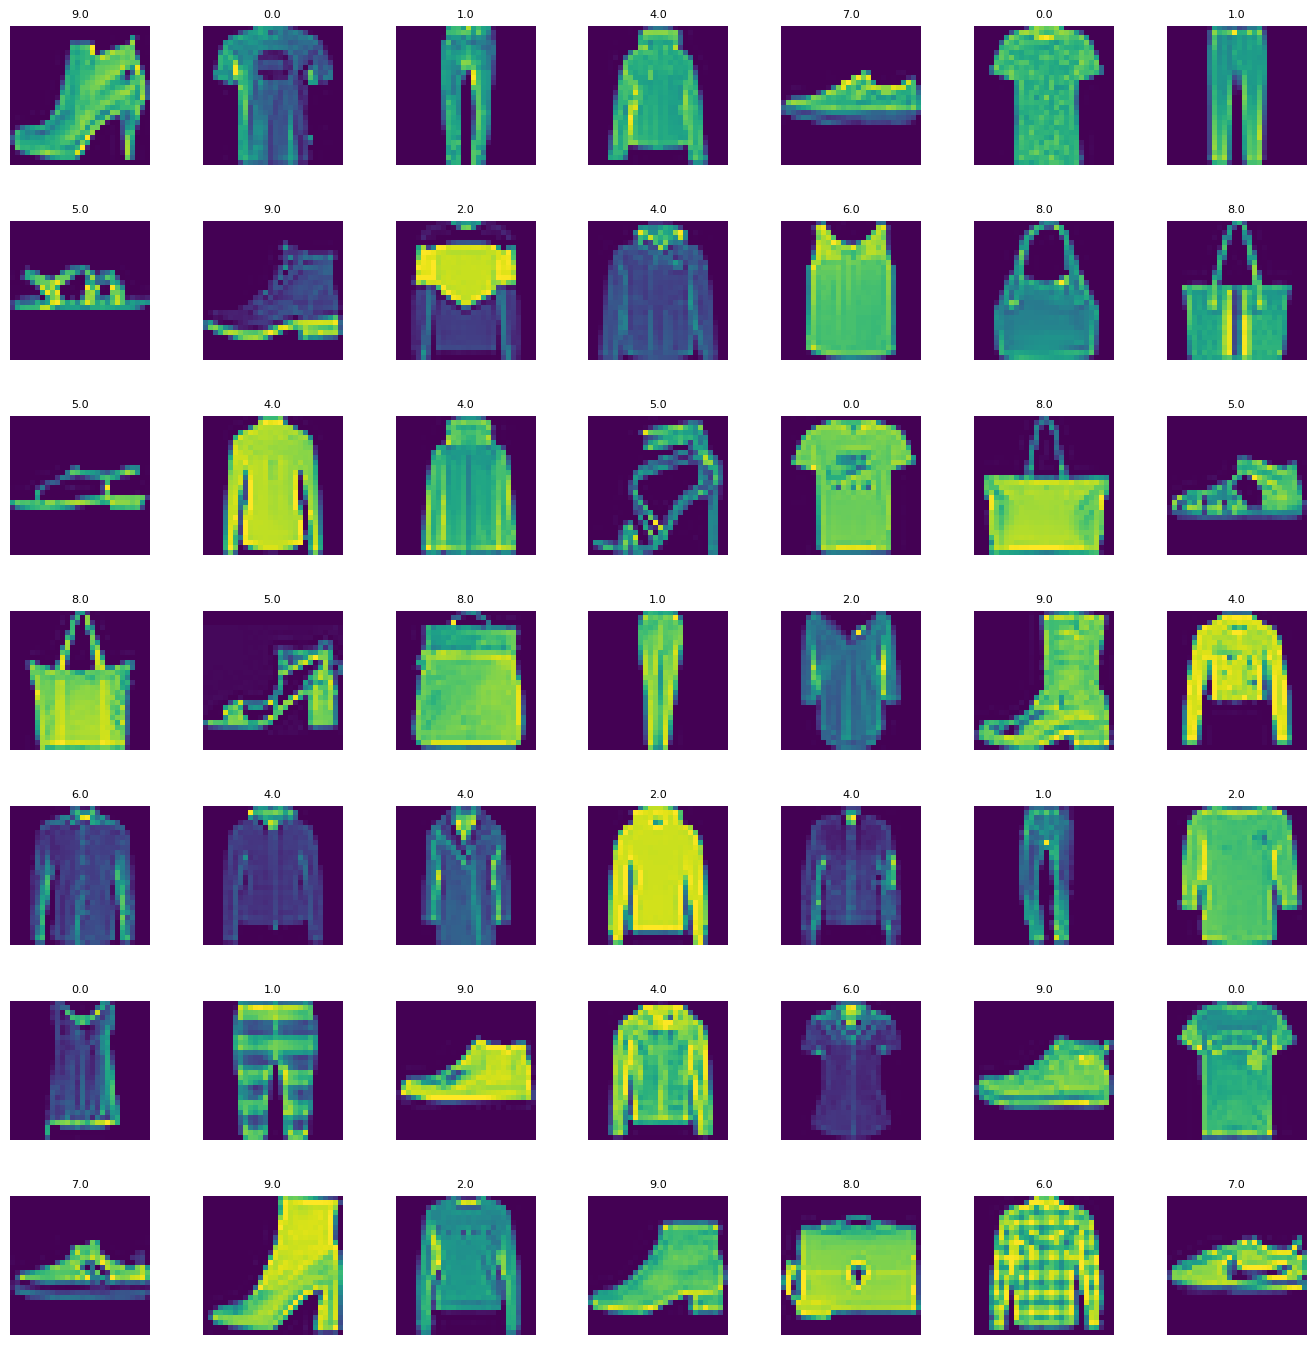

In [13]:
W_grid = 7
L_grid = 7

fig,axes = plt.subplots(L_grid,W_grid,figsize =(17,17))

axes = axes.ravel() 
n_training = len(training) 



for i in np.arange(0,W_grid*L_grid):
        index = np.random.randint(0,n_training)
        axes[i].imshow(training[index,1:].reshape((28,28)))
        axes[i].set_title(training[index,0],fontsize = 8)
        axes[i].axis('off')
        
plt.subplots_adjust(hspace=0.4)  

In [14]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345) 

In [16]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [17]:
X_train.shape


(48000, 28, 28, 1)

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_validate.shape

(12000, 28, 28, 1)

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])


In [22]:
epochs = 20

In [23]:

cnn_model.fit(X_train,y_train,batch_size =512,epochs = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Epoch 1/20
94/94 [==============================] - 3s 28ms/step - loss: 1.3291 - accuracy: 0.5859 - val_loss: 0.7703 - val_accuracy: 0.7300
Epoch 2/20
94/94 [==============================] - 2s 26ms/step - loss: 0.6880 - accuracy: 0.7497 - val_loss: 0.6289 - val_accuracy: 0.7684
Epoch 3/20
94/94 [==============================] - 2s 25ms/step - loss: 0.5973 - accuracy: 0.7813 - val_loss: 0.5715 - val_accuracy: 0.7903
Epoch 4/20
94/94 [==============================] - 2s 25ms/step - loss: 0.5524 - accuracy: 0.7966 - val_loss: 0.5414 - val_accuracy: 0.8028
Epoch 5/20
94/94 [==============================] - 2s 26ms/step - loss: 0.5208 - accuracy: 0.8088 - val_loss: 0.5092 - val_accuracy: 0.8160
Epoch 6/20
94/94 [==============================] - 2s 25ms/step - loss: 0.4960 - accuracy: 0.8192 - val_loss: 0.4894 - val_accuracy: 0.8217
Epoch 7/20
94/94 [==============================] - 2s 26ms/step - loss: 0.4783 - accuracy: 0.8247 - val_loss: 0.4722 - val_accuracy: 0.8302
Epoch 8/20
94

In [24]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3852 - accuracy: 0.8567
Test Accuracy : 0.857


In [25]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)


313/313 [==============================] - 1s 3ms/step


In [26]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

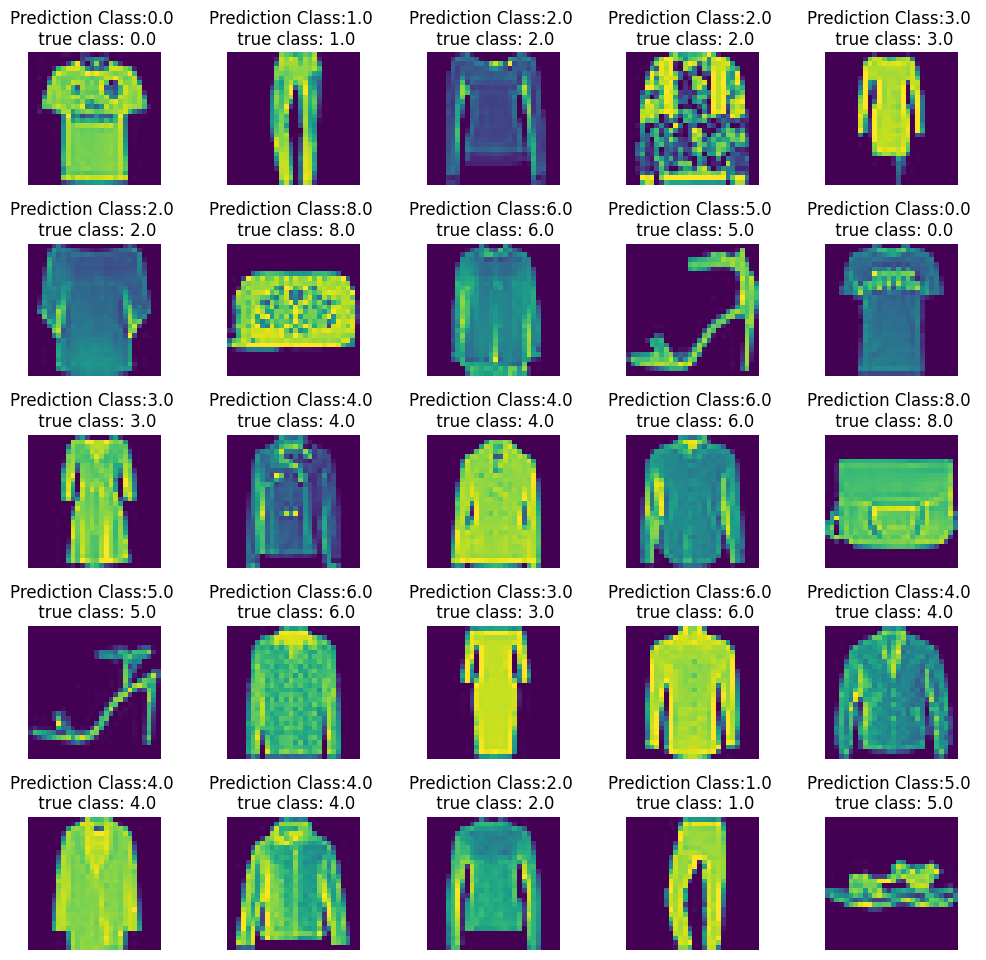

In [27]:
L = 5
W = 5

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)  

In [28]:
from sklearn.metrics import classification_report

classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.78      0.84      0.81      1000
     Class 1       0.97      0.97      0.97      1000
     Class 2       0.79      0.74      0.76      1000
     Class 3       0.86      0.89      0.87      1000
     Class 4       0.70      0.86      0.77      1000
     Class 5       0.95      0.94      0.94      1000
     Class 6       0.69      0.49      0.58      1000
     Class 7       0.92      0.91      0.91      1000
     Class 8       0.95      0.97      0.96      1000
     Class 9       0.94      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000

